In [8]:
import cv2
import numpy as np
import tensorflow as tf

# 저장한 모델 로드
model = tf.keras.models.load_model('./model/best_model_custom_112_4.keras')

# Haar Cascade 로드 (OpenCV의 기본 얼굴 검출기)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 영상 파일 열기 (예: 'video.mp4') 또는 웹캠 사용 (0)
cap = cv2.VideoCapture('./test/면접_test_영상_3.mp4')  # 'video.mp4' 대신 0을 사용하면 웹캠 사용

# 영상 저장 설정
output_file = 'emotion_detection_4_3.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 코덱 설정
fps = int(cap.get(cv2.CAP_PROP_FPS))  # 입력 영상의 FPS를 가져옵니다.
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
out = cv2.VideoWriter(output_file, fourcc, fps, frame_size)

# 이미지 크기 (모델의 입력 크기와 맞춰야 함)
image_size = (112, 112)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 회색조로 변환 (Haar Cascade는 회색조 이미지에서 잘 작동)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 얼굴 검출
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # 얼굴 영역 추출
        face = frame[y:y+h, x:x+w]

        # 모델 입력 크기에 맞춰 리사이즈
        face_resized = cv2.resize(face, image_size)
        face_normalized = face_resized.astype('float32') / 255.0  # 정규화
        face_expanded = np.expand_dims(face_normalized, axis=0)  # 배치 차원 추가

        # 표정 예측
        prediction = model.predict(face_expanded)
        emotion_label = np.argmax(prediction)  # 예측된 레이블 가져오기
        print(prediction)
        temp = ''

        # class 4
        # if emotion_label == 0 or emotion_label == 1:
            # temp = 'bad'
        # else:
            # temp = 'good'
        
        if emotion_label == 0:
            temp = 'neutral'
        elif emotion_label == 1:
            temp = 'happy'
        elif emotion_label == 2:
            temp = 'embarrased'
        elif emotion_label == 3:
            temp = 'unrest'


        # class 5
        # if emotion_label == 0:
        #     temp = 'embarrased'
        # elif emotion_label == 1:
        #     temp = 'neutral'
        # elif emotion_label == 2:
        #     temp = 'happy'
        # elif emotion_label == 3:
        #     temp = 'angry'
        # elif emotion_label == 4:
        #     temp = 'hurt'       

        # class 7
        # if emotion_label == 0:
        #     temp = 'embarrased'
        # elif emotion_label == 1:
        #     temp = 'unrest'
        # elif emotion_label == 2:
        #     temp = 'neutral'
        # elif emotion_label == 3:
        #     temp = 'happy'
        # elif emotion_label == 4:
        #     temp = 'angry'
        # elif emotion_label == 5:
        #     temp = 'hurt'
        # else:
        #     temp = 'sad'

        # calss 3
        # if emotion_label == 0:
        #     temp = 'neutral'
        # elif emotion_label == 1:
        #     temp = 'happy'
        # else:
        #     temp = 'embarrased'

        # 예측 결과 표시
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, f'Emotion: {temp}', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

    # 결과 화면에 표시
    cv2.imshow('Emotion Detection', frame)

    # 프레임을 영상 파일에 저장
    out.write(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # 'q' 키를 누르면 종료
        break

# 자원 해제
cap.release()
out.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
[[0.7941742  0.00768319 0.06602661 0.13211599]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.8122561  0.00624608 0.06956073 0.11193711]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.85644096 0.00600619 0.04739666 0.09015623]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.8609182  0.00517587 0.05272055 0.08118536]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.7521499  0.010131   0.07956568 0.15815344]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.8068395  0.0093329  0.06081499 0.12301255]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.8558155  0.00429375 0.04673753 0.0931533 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.9286207  0.00490981 0.02481137 0.04165816]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.91739386 0.00688682 0.02323463 0.05248478]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.92553174 0.00659215 0.02059885 0.04727725]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.8960984  0.00541934 0.0285982  0.06988408]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.8765226  0.

Invalid SOS parameters for sequential JPEG


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
[[0.03464329 0.9653567 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.9976344  0.00236561]]


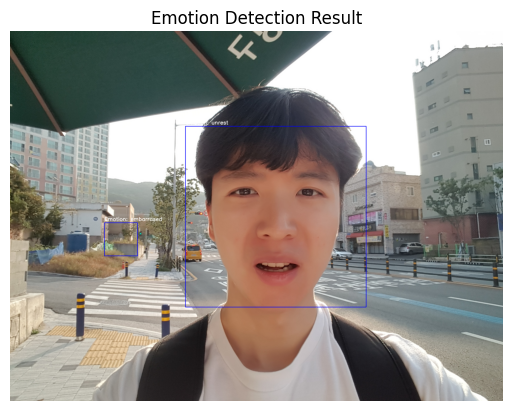

In [30]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 저장한 모델 로드
model = tf.keras.models.load_model('./best_model_custom_112.keras')

# Haar Cascade 로드 (OpenCV의 기본 얼굴 검출기)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 이미지 파일 경로
image_path = './test/0a3a21be68414f07a0e035671e8e3911c7376b4cfc6e100c8a1e240423676188_남_20_당황_도심 환경_20201206192856-008-025.jpg'  # 이미지 파일 경로 지정

# 이미지 로드
image = cv2.imread(image_path)
if image is None:
    print("이미지를 로드할 수 없습니다. 경로를 확인하세요.")
else:
    # 회색조로 변환 (Haar Cascade는 회색조 이미지에서 잘 작동)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 얼굴 검출
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # 얼굴 영역 추출
        face = image[y:y+h, x:x+w]

        # 모델 입력 크기에 맞춰 리사이즈
        face_resized = cv2.resize(face, (112, 112))
        face_normalized = face_resized.astype('float32') / 255.0  # 정규화
        face_expanded = np.expand_dims(face_normalized, axis=0)  # 배치 차원 추가

        # 표정 예측
        prediction = model.predict(face_expanded)
        emotion_label = np.argmax(prediction)  # 예측된 레이블 가져오기
        print(prediction)
        temp = ''
        if emotion_label == 0:
            temp = 'embarrased'
        elif emotion_label == 1:
            temp = 'unrest'
        else:
            temp = 'neutral'

        # 예측 결과 표시
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(image, f'Emotion: {temp}', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

    # 결과 이미지 출력
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Emotion Detection Result")
    plt.show()